## Linear Regression With Tensorflow

In the initial days of 100DaysOfML we have already covered Linear Regression. You can refer this article to take clear explanation for [Linear Regression](https://animevyuh.org/linear-regression)

In this notebook we shall train a Linear Regression model using Tensorflow framework. We shall use the Car Prediction dataset, the same dataset that was used in Day11

Linear Regression is a Regression-based algorithm under Supervised Learning. In Regression the target label is in continuous numerical data type.

To understand Linear Regression consider an example to predict the Blood Pressure of the patients. Here Drug Dosage is a feature and Blood Pressure is the label. Now plot Dosages vs Blood Pressure data on a Scatter Plot. In order to predict the target variable on new data, we must have to train and predict the model with the provided dataset. The formula used to predict the target label for unseen data is given:

Read complete article: [Linear Regression Clearly Exaplained](https://animevyuh.org/linear-regression/)

In [185]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [149]:
data = pd.read_csv("../Day11: Linear Regression/car_prediction.csv")

In [150]:
data.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
52,53,1,mazda rx2 coupe,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
181,182,-1,toyouta tercel,gas,std,four,wagon,rwd,front,104.5,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
188,189,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995.0
170,171,2,toyota tercel,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11199.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0
154,155,0,toyota corolla 1600 (sw),gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0
104,105,3,nissan teana,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199.0
33,34,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0


In [151]:
#scale the label

data['price'] /= 1000

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [153]:
catgortical = list()
numerical = list()
for col in data.columns:
    if data[col].dtype == "O":
        catgortical.append(col)
    else:
        numerical.append(col)

In [154]:
len(catgortical)

10

In [155]:
for check_category in catgortical:
    print(check_category,":",data[check_category].nunique(),":",data[check_category].unique())

CarName : 147 : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'b

In [156]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13.276711
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7.988852
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5.118000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7.788000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10.295000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16.503000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45.400000


In [157]:
feature = "enginesize,curbweight,compressionratio,peakrpm,horsepower,stroke".split(',')

In [158]:
X = data[feature]
Y = data.price

In [159]:
len(X.iloc[:,0].values)

205

In [160]:
X.iloc[:,0].values   #engine size

array([130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 108, 108, 164,
       164, 164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,
        90,  98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110,
       110, 110, 110, 110, 111,  90,  90, 119, 258, 258, 326,  91,  91,
        91,  91,  91,  70,  70,  70,  80, 122, 122, 122, 122, 122, 122,
       140, 134, 183, 183, 183, 183, 234, 234, 308, 304, 140,  92,  92,
        92,  98, 110, 122, 156, 156, 156, 122, 122, 110, 110,  97, 103,
        97,  97,  97,  97,  97,  97,  97,  97, 120, 120, 181, 181, 181,
       181, 181, 181, 120, 152, 120, 152, 120, 152, 120, 152, 120, 152,
       134,  90,  98,  90,  90,  98, 122, 156, 151, 194, 194, 194, 203,
       132, 132, 121, 121, 121, 121, 121, 121,  97, 108, 108, 108, 108,
       108, 108, 108, 108, 108, 108, 108,  92,  92,  92,  92,  92,  92,
        98,  98, 110, 110,  98,  98,  98,  98,  98,  98,  98, 146, 146,
       146, 146, 146, 146, 122, 110, 122, 122, 122, 171, 171, 17

In [161]:
len(Y)

205

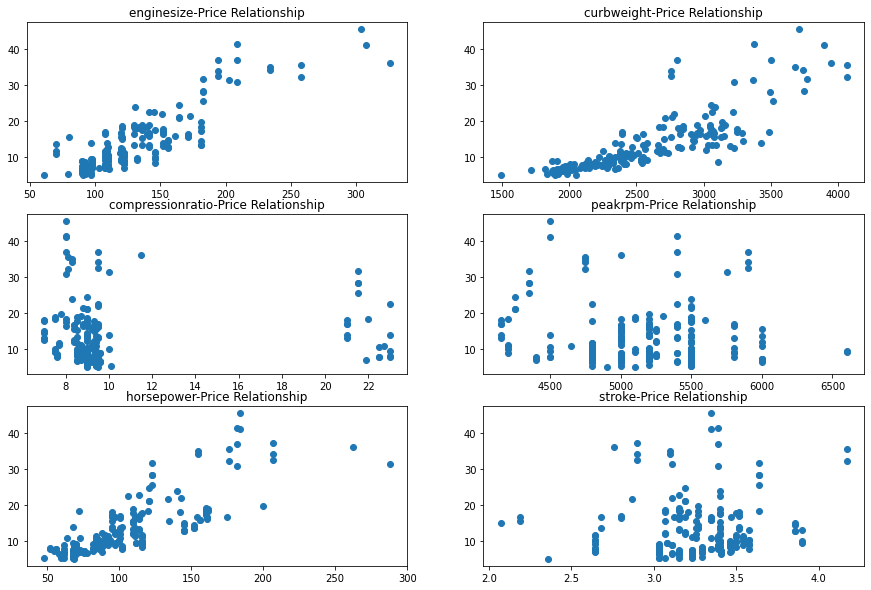

In [162]:
plt.figure(figsize=(15,10))

for index,column in enumerate(feature,1):
    plt.subplot(3,2,index)
    plt.scatter(X.iloc[:,index-1].values,Y)
    plt.title(f"{column}-Price Relationship")

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [164]:
normalizer = keras.layers.Normalization()
normalizer.adapt(X_train)

In [175]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1))
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=0.001),
    loss = "mean_absolute_error",
    metrics = [keras.metrics.RootMeanSquaredError()]
)

In [176]:
batch_size = 15
epochs = 120
history = model.fit(x=X_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/120
11/11 [==============================] - 0s 1ms/step - loss: 1547.0122 - root_mean_squared_error: 1588.8298
Epoch 2/120
11/11 [==============================] - 0s 2ms/step - loss: 1434.0532 - root_mean_squared_error: 1478.3480
Epoch 3/120
11/11 [==============================] - 0s 2ms/step - loss: 1341.3457 - root_mean_squared_error: 1386.6501
Epoch 4/120
11/11 [==============================] - 0s 2ms/step - loss: 1252.3083 - root_mean_squared_error: 1300.5620
Epoch 5/120
11/11 [==============================] - 0s 2ms/step - loss: 1164.4844 - root_mean_squared_error: 1214.4240
Epoch 6/120
11/11 [==============================] - 0s 1ms/step - loss: 1076.9159 - root_mean_squared_error: 1129.3793
Epoch 7/120
11/11 [==============================] - 0s 1ms/step - loss: 989.6450 - root_mean_squared_error: 1046.3383
Epoch 8/120
11/11 [==============================] - 0s 1ms/step - loss: 902.3745 - root_mean_squared_error: 961.8492
Epoch 9/120
11/11 [========================

11/11 [==============================] - 0s 1ms/step - loss: 101.8395 - root_mean_squared_error: 123.0577
Epoch 70/120
11/11 [==============================] - 0s 1ms/step - loss: 98.7431 - root_mean_squared_error: 119.3301
Epoch 71/120
11/11 [==============================] - 0s 1ms/step - loss: 96.0767 - root_mean_squared_error: 115.6756
Epoch 72/120
11/11 [==============================] - 0s 1ms/step - loss: 92.4968 - root_mean_squared_error: 112.0653
Epoch 73/120
11/11 [==============================] - 0s 1ms/step - loss: 90.0990 - root_mean_squared_error: 108.8127
Epoch 74/120
11/11 [==============================] - 0s 1ms/step - loss: 86.8160 - root_mean_squared_error: 105.6025
Epoch 75/120
11/11 [==============================] - 0s 1ms/step - loss: 85.7208 - root_mean_squared_error: 102.9069
Epoch 76/120
11/11 [==============================] - 0s 1ms/step - loss: 82.2901 - root_mean_squared_error: 99.5432
Epoch 77/120
11/11 [==============================] - 0s 1ms/step - l

In [177]:
trained_epochs = history.epoch
history_df = pd.DataFrame(history.history)
rmse = history_df["root_mean_squared_error"]

In [178]:
history_df.sample(6)

,loss,root_mean_squared_error
29,211.297821,258.260590
21,234.543045,287.472198
56,134.132828,162.441025
10,640.302551,716.108521
108,20.201839,27.912510
54,139.874710,170.361313


In [179]:
history_df.tail()

,loss,root_mean_squared_error
115,16.842932,25.261292
116,16.865648,25.338564
117,16.874720,25.208395
118,16.336008,25.073170
119,16.920992,25.790195


Text(0, 0.5, 'Root Mean Squared Error')

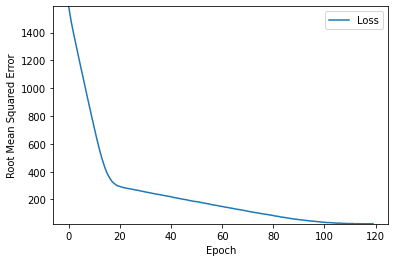

In [180]:
plt.plot(trained_epochs, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min(), rmse.max()])
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")

In [181]:
model.get_weights()

[array([[-1.1302594 ],
        [ 0.07212202],
        [-0.32983798],
        [-0.00809786],
        [ 0.243389  ],
        [ 0.12243456]], dtype=float32),
 array([-0.12762809], dtype=float32)]

In [182]:
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]

In [183]:
trained_weight

array([[-1.1302594 ],
       [ 0.07212202],
       [-0.32983798],
       [-0.00809786],
       [ 0.243389  ],
       [ 0.12243456]], dtype=float32)

In [184]:
trained_bias

array([-0.12762809], dtype=float32)

In [203]:
prediction = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


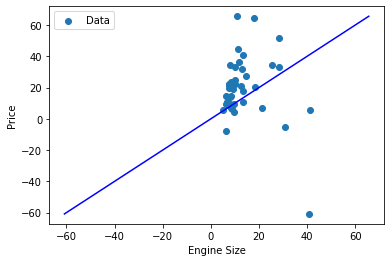

In [209]:
plt.scatter(y_test,prediction, label='Data')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()

Reference:
    
- [Google Crash Course on Machine Learning](https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises)
- [Tensorflow Documentation](https://www.tensorflow.org/tutorials/keras/regression)